### Classification problem?
A classification problem involves predicting whether something is one thing or another.

Binary Classification-- Target can be one of two options(E.g Predict whether or not someone has heart disease based on their health parameters.)

Multi-Class classification-- Target can one of more  than two options(Decide whether a photo of is of food, a person or a dog)

Multi-label classification -- Target can be assigned more than one option(Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy))


###  Make classification data and get it ready¶

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise= 0.03,
                    random_state =42)

In [ ]:
print(f"First 5 X features: \n{X[:5]}")
print(f"\nFirst 5 y features: \n{y[:5]}")


First 5 X features: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y features: 
[1 1 1 1 0]


In [ ]:
# Make dataFrame of circle data 
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0

In [ ]:
# Check different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

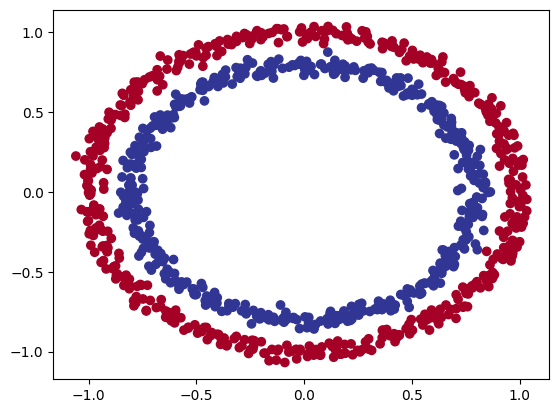

In [ ]:
#Visualize with a plot 
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the firs example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and same for y: ()


### Turn data into tensors and create train and test splits

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#View the first five samples 
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)
len(X_train),len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# Standard Pytorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# 1.Construct a model class that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
    self.layer_1 = nn.Linear(in_features=2, out_features = 5)
    self.layer_2 = nn.Linear(in_features =5, out_features = 1)

  def forward(self,x):

    return self.layer_2(self.layer_1(x))
  

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features = 5, out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

that looks much simpler than subclassing nn.Module, why not just always use nn.Sequential?

nn.Sequential is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.



In [ ]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.3713],
        [-0.3886],
        [-0.2932],
        [-0.3936],
        [-0.2411],
        [-0.2521],
        [-0.3420],
        [-0.3099],
        [-0.2955],
        [-0.3892]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])




1.   different problem types require different loss functions.For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.And for a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.
2.   However, the same optimizer function can often be used across different problem spaces.



PyTorch has two binary cross entropy implementations:


1.   torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2.   torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).



In [ ]:
# Create a loss function 
# loss_fn = nn.BCELoss() = no sigmoid built in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in


# Create an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr= 0.1)

The evaluation metric can be used to find out how our model is doing.

We can think of it as the inverse of the loss function. It shows us how tohe model goes right.

There are several evaluation metrics. But now lets check "Accuaracy".
Accuaracy can be measured by dividing the total number of correct predictions over the total number of predictions.


In [ ]:
# Calculate accuracy(a classification metric)
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()# torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

### Train Model

In [ ]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3713],
        [-0.3886],
        [-0.2932],
        [-0.3936],
        [-0.2411]], grad_fn=<SliceBackward0>)

In [ ]:
# We will use sigmoid into such a formm.
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4082],
        [0.4041],
        [0.4272],
        [0.4029],
        [0.4400]], grad_fn=<SigmoidBackward0>)

Our output is looking random. But it has some kind of consistecy.They're now in the form of prediction probabilities.To turn our prediction probabilities in prediction labels, we can round the outputs of the sigmoid activation function


In [ ]:
## If y_pred_probs >= 0.5, y=1 (class 1)
## If y_pred_probs < 0.5, y=0 (class 0)
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [ ]:
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
torch.manual_seed(42)

epochs = 100

X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # Forward pass(model outputs raw logits)
  y_logits= model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # loss and acc

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  
  # optimizer zero grad
  optimizer.zero_grad()

  # Loss backwards
  loss.backward()

  # optimizer.step
  optimizer.step()

  ## Testing
  model_0.eval()
  with torch.inference_mode():
    # Forward
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate loss and acc
    test_loss = loss_fn(test_logits,
                        y_test)
    
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")                                 

Epoch: 0 | Loss: 0.70570, Accuracy: 50.00% | Test loss: 0.70310, Test acc: 50.00%
Epoch: 10 | Loss: 0.69872, Accuracy: 50.00% | Test loss: 0.69642, Test acc: 50.00%
Epoch: 20 | Loss: 0.69589, Accuracy: 50.00% | Test loss: 0.69382, Test acc: 50.00%
Epoch: 30 | Loss: 0.69465, Accuracy: 50.00% | Test loss: 0.69283, Test acc: 50.00%
Epoch: 40 | Loss: 0.69404, Accuracy: 50.00% | Test loss: 0.69251, Test acc: 50.00%
Epoch: 50 | Loss: 0.69371, Accuracy: 45.38% | Test loss: 0.69248, Test acc: 48.00%
Epoch: 60 | Loss: 0.69350, Accuracy: 43.38% | Test loss: 0.69258, Test acc: 45.50%
Epoch: 70 | Loss: 0.69337, Accuracy: 46.75% | Test loss: 0.69274, Test acc: 48.50%
Epoch: 80 | Loss: 0.69327, Accuracy: 50.00% | Test loss: 0.69291, Test acc: 50.00%
Epoch: 90 | Loss: 0.69320, Accuracy: 50.00% | Test loss: 0.69309, Test acc: 50.00%


###Make predictions and evaluate the model

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


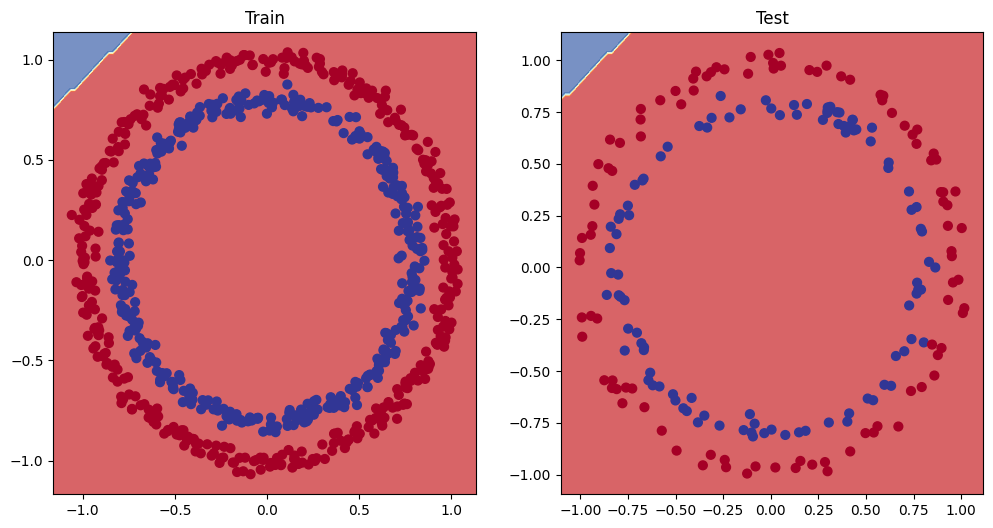

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Here our model is underfitting. It means its not learning predictive patterns from the data. Next step will be improve our model.

 ### Improving a model (from a model perspective)
 model improve tecniques:


1.   Add more layers
2.   Add more hidden units
3.   Fitting for longer (more epochs)
4.   Changing the activation functions
5.   Change the learning rate
6.   Change the loss function
7.   Use transfer learning



In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features= 10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_1 = CircleModelV1().to(device)
model_1 

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn= nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(),lr = 0.1)


In [ ]:
epochs = 1000

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):


  ### Training
  # Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))      

  # loss and acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)
  # optimizer
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # loss and acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}% ")


Epoch: 0 | Loss: 0.69396 | Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00% 
Epoch: 100 | Loss: 0.69305 | Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00% 
Epoch: 200 | Loss: 0.69299 | Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00% 
Epoch: 300 | Loss: 0.69298 | Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00% 
Epoch: 400 | Loss: 0.69298 | Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00% 
Epoch: 500 | Loss: 0.69298 | Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00% 
Epoch: 600 | Loss: 0.69298 | Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 700 | Loss: 0.69298 | Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 800 | Loss: 0.69298 | Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00% 
Epoch: 900 | Loss: 0.69298 | Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00% 


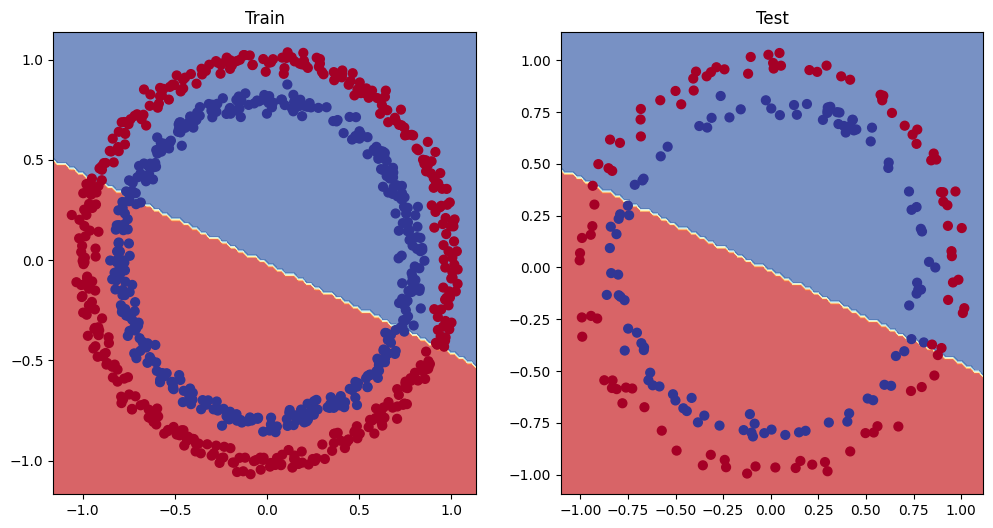

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Preparing data to see if our model can model a straight line

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias 

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


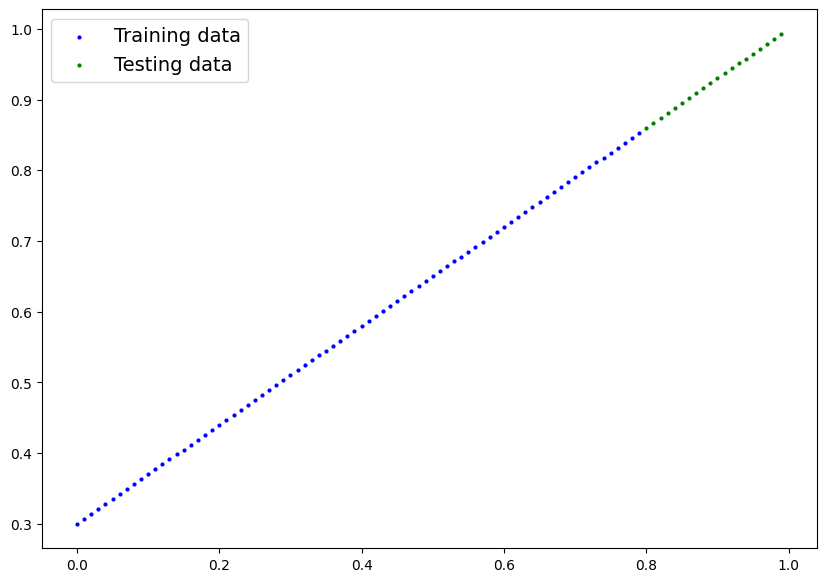

In [ ]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

#### Adjusting model_1 to fit a straight line

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features =  10),
    nn.Linear(in_features = 10, out_features =  10),
    nn.Linear(in_features = 10, out_features =  1)


).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
## Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),lr = 0.1)

In [ ]:
# Train the model
torch.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


for epoch in range(epochs):
  ###Training
  # Forward pass
  y_pred = model_2(X_train_regression)

  # calculate loss (no accuracy since it's a regression problem, not classification)
  loss = loss_fn(y_pred,y_train_regression)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss Backwards
  loss.backward()

  #optimizer.step
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # Forward pass
    test_pred = model_2(X_test_regression)
    # Calculate the loss
    test_loss = loss_fn(test_pred,y_test_regression)


    if epoch % 100 ==0:
      print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.57896, Test loss: 0.47265
Epoch: 100 | Train loss: 0.05652, Test loss: 0.17491
Epoch: 200 | Train loss: 0.05272, Test loss: 0.15038
Epoch: 300 | Train loss: 0.05733, Test loss: 0.14733
Epoch: 400 | Train loss: 0.05780, Test loss: 0.14758
Epoch: 500 | Train loss: 0.04943, Test loss: 0.12419
Epoch: 600 | Train loss: 0.05283, Test loss: 0.14350
Epoch: 700 | Train loss: 0.07244, Test loss: 0.12574
Epoch: 800 | Train loss: 0.04493, Test loss: 0.11135
Epoch: 900 | Train loss: 0.05377, Test loss: 0.13252


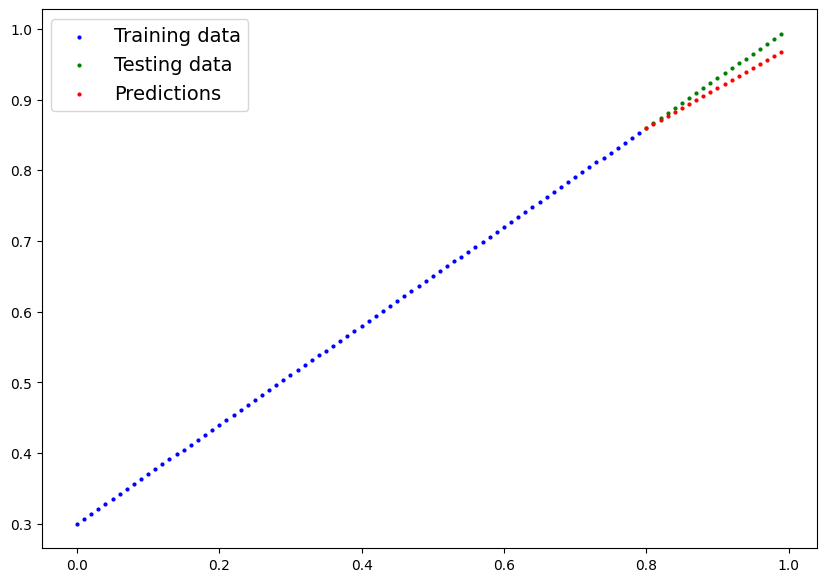

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

####  Recreating non-linear data (red and blue circles)¶

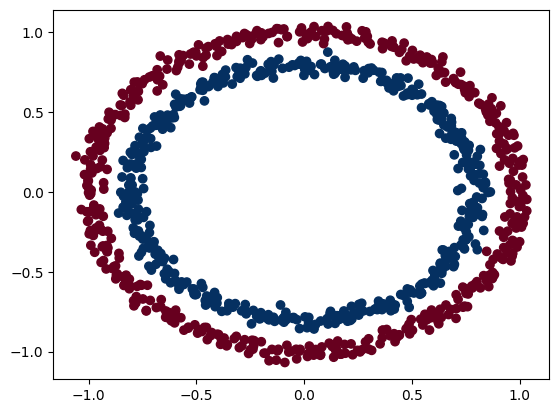

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdBu)

In [ ]:
import torch 
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test, y_train,y_test = train_test_split(X,y,
                                                  test_size = 0.2,
                                                  random_state =42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
#Build model withn non linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()


  def forward(self,x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.1)

###Training a model with non-linearity¶

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) 
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

   
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


####  Evaluating a model trained with non-linear activation functions

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

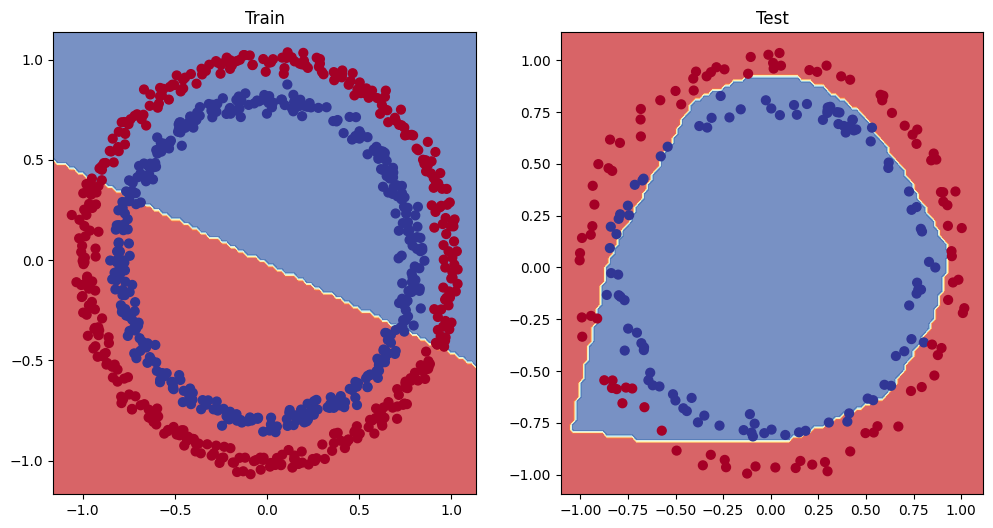

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

### Replicating non-linear activation functions

In [ ]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

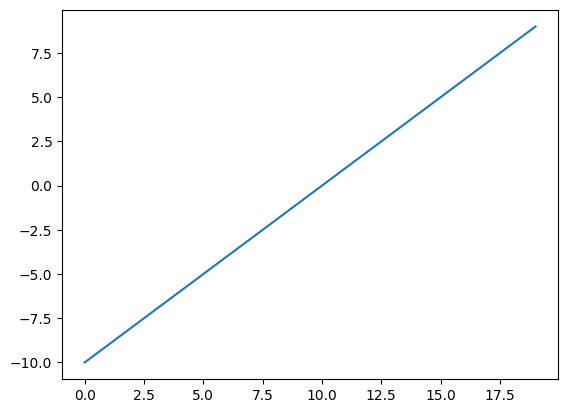

In [ ]:
plt.plot(A);

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)


relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

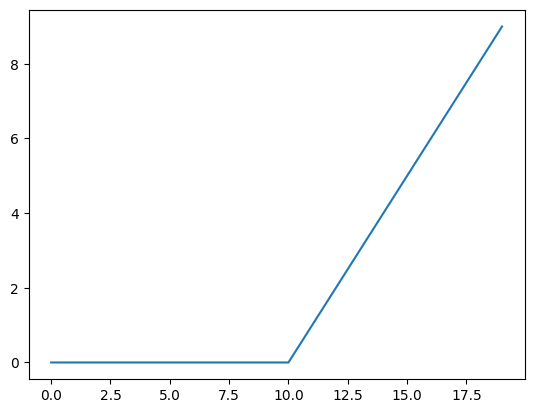

In [ ]:
plt.plot(relu(A))

In [ ]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

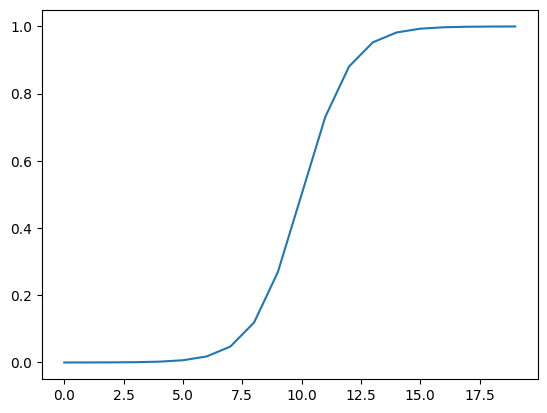

In [ ]:
plt.plot(sigmoid(A));

## Exercise

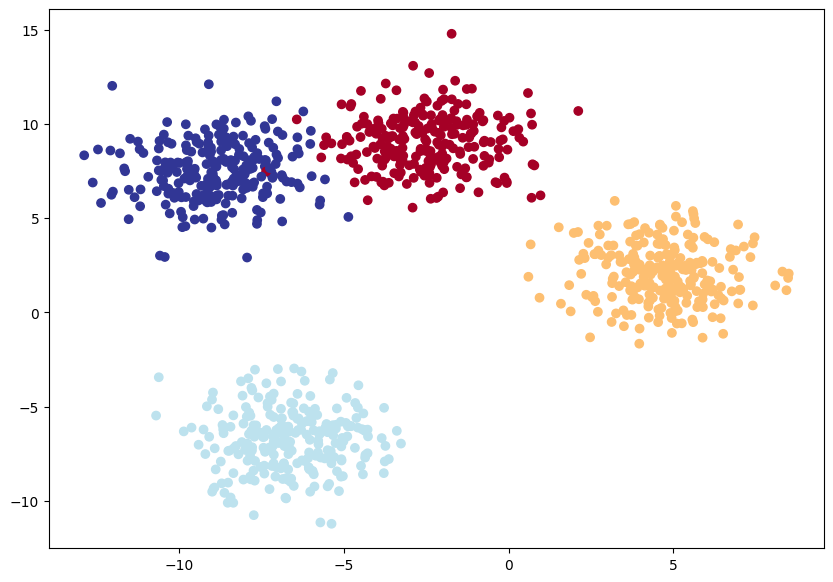

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters 
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED =42

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES, # y Labels
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)
# Turn data into tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test sets
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,
                                                                     y_blob,
                                                                     test_size = 0.2,
                                                                     random_state = 42)
# Plot data 
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap = plt.cm.RdYlBu);


In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self,input_features,output_features, hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.Linear(in_features = hidden_units,out_features= output_features)


    )
  def forward(self,x):
      return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Creating a loss function and optimizer for a multi-class PyTorch model

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr = 0.1)

In [ ]:
model_4(X_blob_train.to(device))[:5]

tensor([[-0.3405, -0.5124, -1.7883,  0.5025],
        [-1.8266, -1.8107, -2.9885, -1.5585],
        [-0.0521,  1.5338,  3.1319, -0.3696],
        [-0.3963,  0.7238,  1.5234, -0.4857],
        [-1.6042, -1.3945, -2.2291, -1.4074]], grad_fn=<SliceBackward0>)

In [ ]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES 

(torch.Size([4]), 4)

In [ ]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.5224, -0.7389, -2.1115,  0.2979],
        [-1.9929, -1.4178, -1.7169, -2.1706],
        [ 0.0076,  1.3552,  2.5773, -0.1231],
        [-0.1997, -0.1411, -1.0259,  0.5217],
        [-1.6767, -1.8838, -3.4003, -1.2060]], grad_fn=<SliceBackward0>)
tensor([[0.2336, 0.1881, 0.0477, 0.5306],
        [0.2027, 0.3603, 0.2672, 0.1697],
        [0.0532, 0.2048, 0.6952, 0.0467],
        [0.2195, 0.2328, 0.0961, 0.4516],
        [0.2784, 0.2263, 0.0497, 0.4457]], grad_fn=<SliceBackward0>)


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)